#### (a)Take a grayscale image of size 512x512, add some Gaussian Noise & apply 4th order Butterworth & Gaussian Low Pass Filter to analyze their performance quantitatively

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

### Loading the original image

shape of the image: (688, 688)


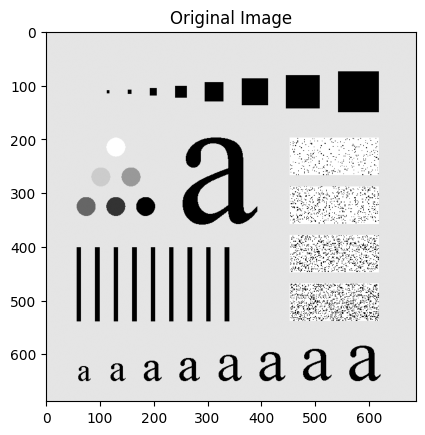

min pixel intensity: 0
max pixel intensity: 255


In [4]:
original_image= cv2.imread('./images/Characters_Test_Pattern.tif',0)
print(f'shape of the image: {original_image.shape}')

plt.imshow(original_image,cmap='gray')
plt.title('Original Image')
plt.show()

img_arr = np.array(original_image)
print(f"min pixel intensity: {np.min(img_arr)}")
print(f"max pixel intensity: {np.max(img_arr)}")

### Function for ButterWorth LowPass Filter

In [12]:
def butterWorth_lowPass_filter(image, order, cutoff_freq):
    height, width = image.shape
    c1, c2 = height/2, width/2 #center of the frequency domain
    butterworth_filter = np.zeros((height, width), dtype=np.float64)
    
    for u in range(height):
        for v in range(width):
            D_uv = np.sqrt((u-c1)**2 + (v-c2)**2)
            butterworth_filter[u,v] = 1 / (1 + (D_uv / cutoff_freq)**(2*order))
            
    filtered_image = image*butterworth_filter
    return filtered_image
            
            

### Function for Gaussian Low pass filtter

In [23]:
def gaussian_lowPass_filter(image, cutoff_freq):
    height, width = image.shape
    c1, c2 = height/2, width/2 #center of the frequency domain
    guassian_filter = np.zeros((height,width), dtype=np.float64)
    
    for u in range(height):
        for v in range(width):
            D_uv = np.sqrt((u-c1)**2 + (v-c2)**2)
            guassian_filter[u,v] = np.exp(-(D_uv**2) / (2*(cutoff_freq**2)))
            
    filtered_image = image*guassian_filter
    return filtered_image        
    

### Adding the Guassian noise

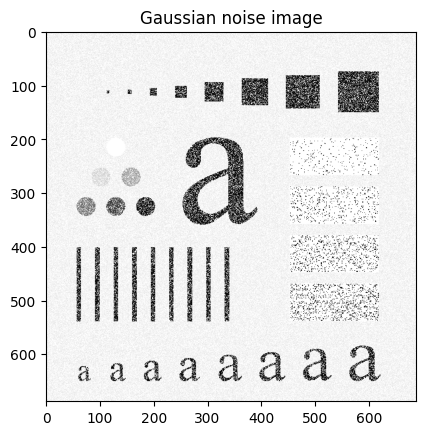

In [3]:
mean = 7
std_dev = 13

gaussian_noise = np.random.normal(mean, std_dev, original_image.shape).astype(np.uint8) #generating random values following a Gaussian(normal) distribution
noisy_image = cv2.add(original_image, gaussian_noise)
 
plt.imshow(noisy_image, cmap='gray')
plt.title("Gaussian noise image") 
plt.show()



### FFT of noisy image

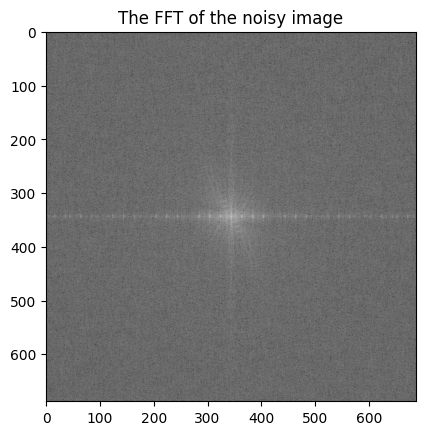

In [20]:
fft = np.fft.fft2(noisy_image)
fft_shift = np.fft.fftshift(fft)
noisy_image_fft = fft_shift

magnitude_spectrum = np.log(np.abs(noisy_image_fft) + 1)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('The FFT of the noisy image')
plt.show()

### Appying the butterWorth low pass filter

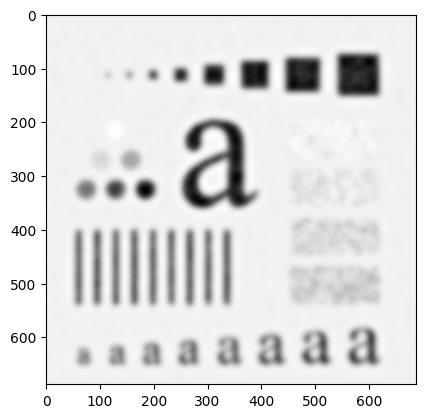

In [ ]:
filtered_image = butterWorth_lowPass_filter(noisy_image_fft, 2, 25)

#transform back to spatial domain
filtered_image = np.fft.ifftshift(filtered_image)
butterWorth_filtered_image = np.fft.ifft2(filtered_image)
butterWorth_filtered_image = np.abs(butterWorth_filtered_image)

plt.imshow(butterWorth_filtered_image, cmap='gray')
plt.show()

### Applying Gaussian low pass filter

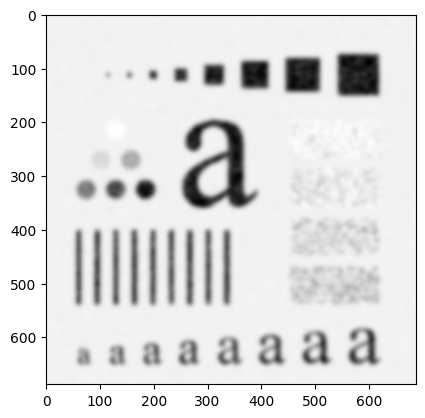

In [25]:
filtered_image = gaussian_lowPass_filter(noisy_image_fft, 25)

#transform back to spatial domain
filtered_image = np.fft.ifftshift(filtered_image)
gaussian_filtered_image = np.fft.ifft2(filtered_image)
gaussian_filtered_image = np.abs(gaussian_filtered_image)

plt.imshow(gaussian_filtered_image, cmap='gray')
plt.show()